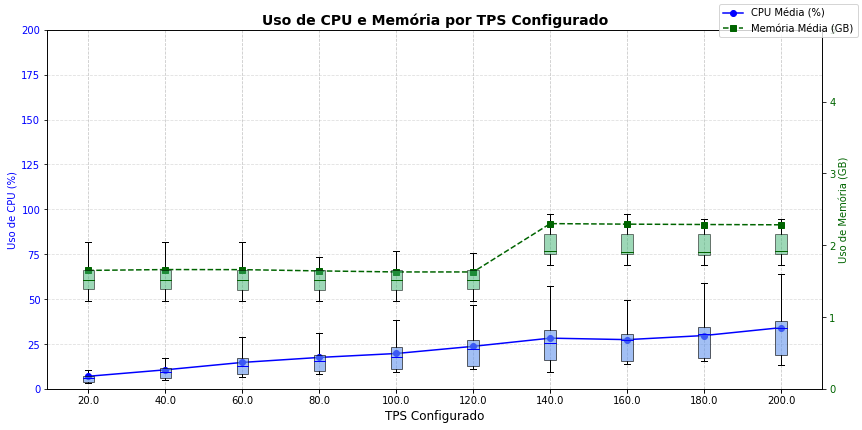

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Caminho da pasta com os arquivos CSV
resource_folder = "./statusReports_resource_metrics_by_tps"
tps_values = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]  # Valores reais de TPS

cpu_data, mem_data = [], []

for tps in tps_values:
    file_path = os.path.join(resource_folder, f"statusReports_resource_metrics_tps_{tps}.csv")
    df = pd.read_csv(file_path)

    cpu_vals = df[["CPU%(avg)", "CPU%(max)"]] * 100
    cpu_data.append(cpu_vals.values.flatten())

    mem_vals = df[["Memory(avg) [GB]", "Memory(max) [GB]"]]
    mem_data.append(mem_vals.values.flatten())

cpu_mean_trend = [np.mean(data) for data in cpu_data]
mem_mean_trend = [np.mean(data) for data in mem_data]

# Agora as posições no eixo X são os próprios valores de TPS
positions = np.array(tps_values, dtype=float)
width = 0  # largura horizontal (ajustada ao espaçamento entre TPS)
ax1.set_xlim(min(tps_values) - 10, max(tps_values) + 10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# CPU (boxplot à esquerda)
ax1.boxplot(cpu_data, positions=positions - width, widths=3,
            patch_artist=True, boxprops=dict(facecolor='cornflowerblue', alpha=0.6),
            medianprops=dict(color='blue'), showfliers=False)
ax1.plot(positions - width, cpu_mean_trend, linestyle='-', color='blue', marker='o', label='CPU Média (%)')

ax1.set_ylim(0, 200)
ax1.set_ylabel('Uso de CPU (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Agora o eixo X está corretamente ligado aos TPS reais
ax1.set_xlabel('TPS Configurado', fontsize=12)
ax1.set_xticks(positions)
ax1.set_xticklabels(tps_values, fontsize=10)

# Memória (boxplot à direita)
ax2 = ax1.twinx()
ax2.boxplot(mem_data, positions=positions + width, widths=3,
            patch_artist=True, boxprops=dict(facecolor='mediumseagreen', alpha=0.5),
            medianprops=dict(color='darkgreen'), showfliers=False)
ax2.plot(positions + width, mem_mean_trend, linestyle='--', color='darkgreen', marker='s', label='Memória Média (GB)')

mem_max_val = max([max(data) for data in mem_data])
mem_ymax = np.ceil(mem_max_val + 0.5)
ax2.set_ylim(0, mem_ymax)
ax2.set_ylabel('Uso de Memória (GB)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Legenda e finalização
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', frameon=True)

plt.title('Uso de CPU e Memória por TPS Configurado', fontsize=14, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("statusReports_cpu_memoria_tps.png", dpi=300)
plt.show()
